In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
XandY = pd.read_csv('X_and_Y_7-Day Lag.csv', dtype = float)

In [3]:
XandY

,Shanghai,Shanghai 2,Shanghai 2.1,Shanghai 2.2,Shanghai 2.3,Shanghai 2.4,Shanghai 2.5,DOW,DOW.1,DOW.2,...,DOW.5,DOW.6,Y,Y.1,Y.2,Y.3,Y.4,Y.5,Y.6,Y.7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104.39,NaN,NaN,NaN,NaN,NaN,NaN,921.340027,NaN,NaN,...,NaN,NaN,5.2400,5.2400,NaN,NaN,NaN,NaN,NaN,NaN
2,109.13,104.39,NaN,NaN,NaN,NaN,NaN,925.500000,921.340027,NaN,...,NaN,NaN,5.2400,5.2400,5.2400,NaN,NaN,NaN,NaN,NaN
3,114.55,109.13,104.39,NaN,NaN,NaN,NaN,921.729980,925.500000,921.340027,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,NaN,NaN,NaN,NaN
4,120.25,114.55,109.13,104.39,NaN,NaN,NaN,925.690002,921.729980,925.500000,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,NaN,NaN
5,125.27,120.25,114.55,109.13,104.39,NaN,NaN,920.409973,925.690002,921.729980,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,NaN
6,125.28,125.27,120.25,114.55,109.13,104.39,NaN,920.369995,920.409973,925.690002,...,921.340027,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,NaN
7,126.45,125.28,125.27,120.25,114.55,109.13,104.39,920.609985,920.369995,920.409973,...,925.500000,921.340027,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
8,127.61,126.45,125.28,125.27,120.25,114.55,109.13,914.890015,920.609985,920.369995,...,921.729980,925.500000,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
9,128.84,127.61,126.45,125.28,125.27,120.25,114.55,907.070007,914.890015,920.609985,...,925.690002,921.729980,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400


In [10]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,0:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    
    X = (np.array(XandY.iloc[(endLoc):(6886),0:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 1.17228839e-07 -1.21557617e-07  1.08023769e-08 -1.19354130e-08
  -4.85365256e-09  1.02130594e-08  4.93563044e-10  3.92737717e-09
  -4.15557640e-09 -5.30115350e-10 -3.75455868e-09  6.31359731e-09
  -4.64126007e-09  2.82277849e-09 -5.15529202e-06  6.29361797e-06
  -1.49523486e-05  6.61845473e-06  6.21920354e-06  8.11747076e-07]
 [-1.21557617e-07  2.43270093e-07 -1.32715006e-07  2.30658756e-08
  -6.77478790e-09 -1.54969357e-08  1.01960378e-08 -6.36135240e-09
   1.04564439e-08 -3.47742781e-09  3.30235344e-09 -1.02482422e-08
   1.11598868e-08 -4.84097226e-09  1.39100826e-05 -1.91763597e-05
   2.11245282e-05 -2.20735706e-05  5.54559307e-07  5.67346363e-06]
 [ 1.08023769e-08 -1.32715006e-07  2.43208778e-07 -1.33176210e-07
   2.34963138e-08 -6.73900641e-09 -4.87170960e-09  1.82400647e-11
  -6.74433608e-09  1.05628356e-08 -3.66142343e-09  3.47137639e-09
  -1.08277868e-08  7.18711081e-09 -7.44516197e-06  2.02246592e-05
  -1.77705236e-05  2.12774340e-05 -2.29089858e-05  6.61608657e-06]
 

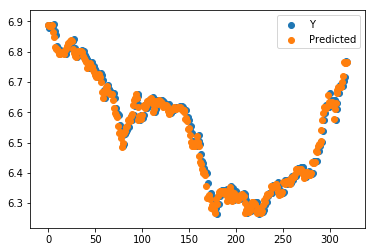

In [11]:
linRegress(XandY)

In [12]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,13:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    X = (np.array(XandY.iloc[(endLoc):(6886),13:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 2.15146437e-10 -2.33213899e-06 -2.62122415e-07 -1.71836191e-07
   1.87353507e-07  2.91681115e-07  2.14196754e-06]
 [-2.33213899e-06  3.88587999e+00 -3.45007771e+00 -2.73565870e-01
  -2.95260939e-01  1.11763227e-01  2.31209573e-02]
 [-2.62122415e-07 -3.45007771e+00  6.94909968e+00 -3.20821095e+00
  -9.72758899e-03 -3.93512270e-01  1.12640251e-01]
 [-1.71836191e-07 -2.73565870e-01 -3.20821095e+00  6.96559517e+00
  -3.17902494e+00 -9.26767220e-03 -2.95388493e-01]
 [ 1.87353507e-07 -2.95260939e-01 -9.72758904e-03 -3.17902494e+00
   6.96559687e+00 -3.20841852e+00 -2.73312606e-01]
 [ 2.91681115e-07  1.11763228e-01 -3.93512270e-01 -9.26767238e-03
  -3.20841852e+00  6.95006765e+00 -3.45086299e+00]
 [ 2.14196754e-06  2.31209572e-02  1.12640251e-01 -2.95388493e-01
  -2.73312607e-01 -3.45086299e+00  3.88207842e+00]]
[[-1.01230499e-06]
 [-1.22646526e-02]
 [-2.50957413e-02]
 [-3.47482483e-03]
 [ 4.14404987e-02]
 [ 1.40528705e-01]
 [ 8.59682244e-01]]
SSE:  0.18641892225651624


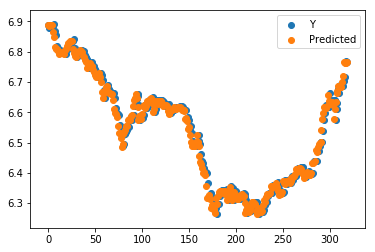

In [14]:
linRegress(XandY)

In [15]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,6:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    X = (np.array(XandY.iloc[(endLoc):(6886),6:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 5.51595884e-10 -6.54828315e-11 -1.97241120e-11  1.39871932e-11
  -1.53183218e-12 -1.23636791e-11 -2.16108371e-11 -3.30867725e-11
   1.27044465e-06  1.46311615e-07  2.32162565e-07 -4.30350363e-08
  -1.80513582e-07 -1.55895124e-06]
 [-6.54828315e-11  1.55939001e-07 -1.43912189e-07 -4.65060179e-09
  -1.03492248e-08  8.08208537e-09  1.17396033e-09 -6.26868150e-09
  -9.89153199e-06  3.55823789e-06  1.13604438e-05 -9.18798135e-06
   1.26217947e-05 -8.47674706e-06]
 [-1.97241120e-11 -1.43912189e-07  2.88537489e-07 -1.39626373e-07
   5.17375400e-09 -1.81145527e-08  6.78109824e-09  1.18517482e-09
   4.58500192e-06 -9.03787857e-06 -6.59172876e-06  1.90939326e-05
  -2.24752048e-05  1.44155921e-05]
 [ 1.39871932e-11 -4.65060179e-09 -1.39626373e-07  2.88972044e-07
  -1.39471219e-07  4.80453507e-09 -1.81011728e-08  8.05524785e-09
   3.57932322e-05 -2.71268637e-05 -1.21858764e-05 -7.85272411e-06
   2.10405054e-05 -9.66019165e-06]
 [-1.53183218e-12 -1.03492248e-08  5.17375400e-09 -1.39471219e

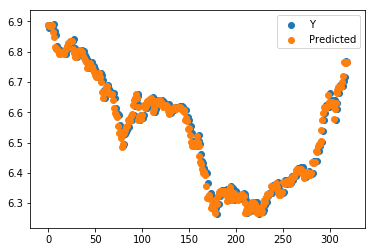

In [17]:
linRegress(XandY)

In [24]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X1 = (np.array(XandY.iloc[3700:endLoc,13:20], dtype = float))
    X2 = (np.array(XandY.iloc[3700:endLoc,0:6], dtype = float))
    X = np.concatenate((X1,X2),axis=1)
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    
    X1 = (np.array(XandY.iloc[(endLoc):(6886),13:20], dtype = float))
    X2 = (np.array(XandY.iloc[(endLoc):(6886),0:6], dtype = float))
    X = np.concatenate((X1,X2),axis=1)
    
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 2.50581678e-10 -2.67085847e-06 -3.24410920e-07 -2.12078553e-07
   2.16116538e-07  3.37785877e-07  2.54247004e-06 -1.70636925e-11
  -2.34347332e-12  4.09264409e-12 -2.69911426e-11 -1.01994643e-11
  -8.78059098e-11]
 [-2.67085847e-06  3.89678232e+00 -3.45407323e+00 -2.74337002e-01
  -2.96596729e-01  1.10111137e-01  1.96153536e-02 -4.49762486e-06
   1.29113132e-05 -8.35282910e-06  1.11761603e-05  1.52836518e-05
  -2.51134081e-05]
 [-3.24410920e-07 -3.45407323e+00  6.95324049e+00 -3.20964345e+00
  -7.33714640e-03 -3.94829476e-01  1.12803965e-01  6.56341551e-06
  -1.62070881e-05  1.93028261e-05 -2.09528403e-05 -1.72592486e-07
   1.16933349e-05]
 [-2.12078552e-07 -2.74337003e-01 -3.20964345e+00  6.97095678e+00
  -3.18250955e+00 -6.90751510e-03 -2.97432201e-01 -1.62428795e-05
   2.16695920e-05 -1.67517470e-05  2.11855349e-05 -2.18684247e-05
   1.21058451e-05]
 [ 2.16116538e-07 -2.96596729e-01 -7.33714652e-03 -3.18250955e+00
   6.97004040e+00 -3.21083944e+00 -2.72867080e-01  7.3943084

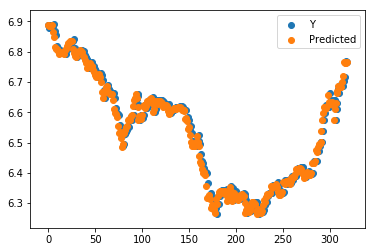

In [25]:
linRegress(XandY)